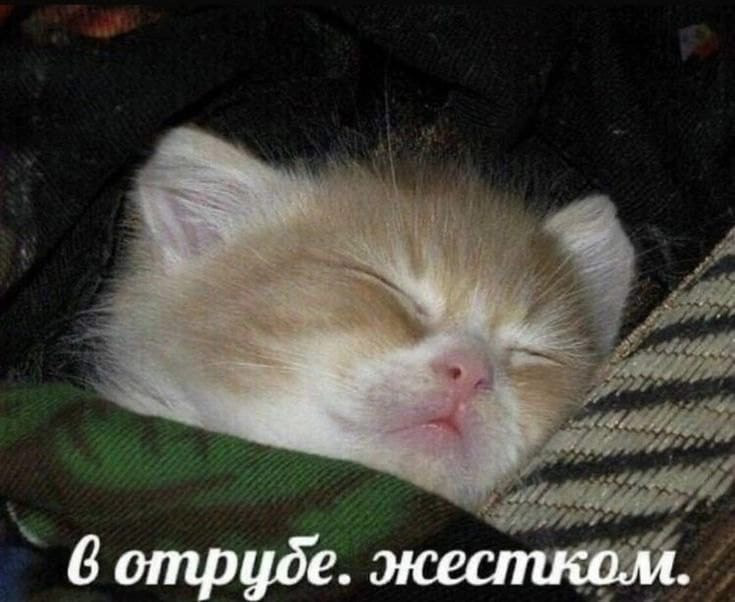

In [2]:
from PIL import Image
import numpy as np
img = Image.open('a.jpeg')
img

In [3]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [17]:
x.shape

(602, 735, 3)

In [18]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

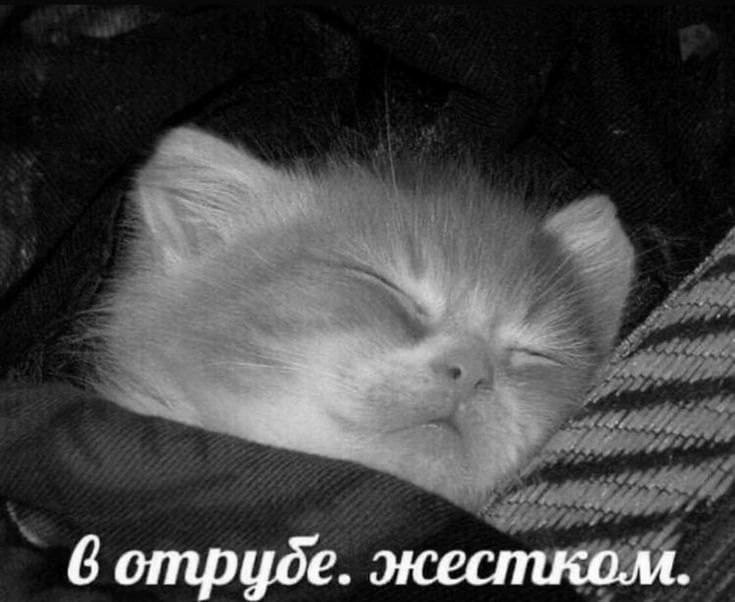

In [19]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

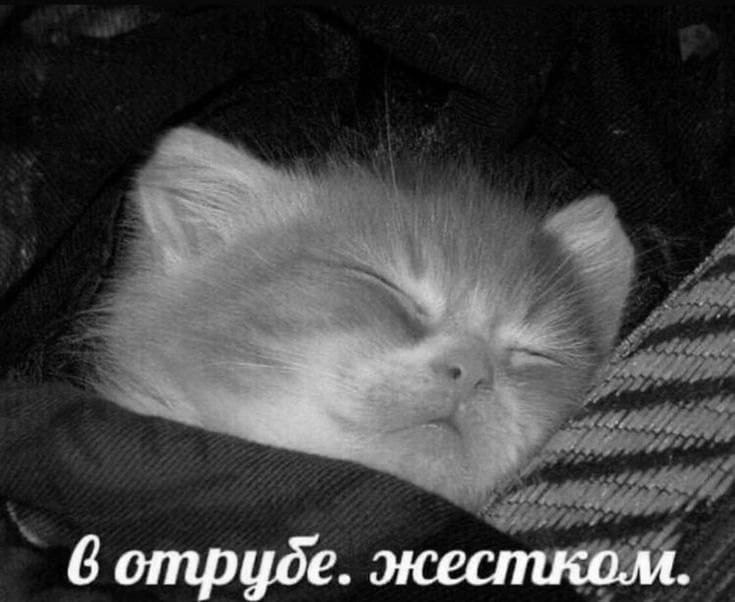

In [21]:

Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

In [22]:
y = x.mean(axis=2)
y


array([[ 6.3333335,  7.3333335,  7.3333335, ...,  9.       ,  9.       ,
         9.       ],
       [ 9.666667 , 10.666667 , 11.333333 , ...,  9.       ,  9.       ,
         9.       ],
       [10.333333 , 10.333333 , 11.333333 , ...,  9.       ,  9.       ,
         9.       ],
       ...,
       [40.666668 , 40.666668 , 45.       , ..., 60.333332 , 66.333336 ,
        69.333336 ],
       [48.666668 , 51.666668 , 52.       , ..., 52.333332 , 53.333332 ,
        54.333332 ],
       [48.666668 , 51.666668 , 52.       , ..., 52.333332 , 53.333332 ,
        54.333332 ]], dtype=float32)

In [23]:
y.shape

(602, 735)

SVD 


In [24]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [25]:
U.shape

(602, 602)

In [26]:
V.shape

(602, 735)

In [29]:
R, G, B = x[:,:,0], x[:,:,1], x[:,:,2]

Проверка корректности разложения


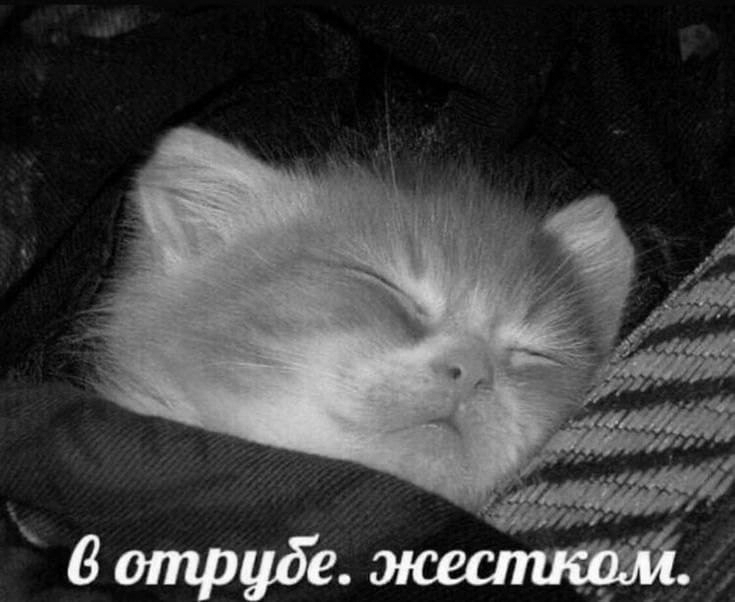

In [27]:
Y_full = U.dot(np.diag(S)).dot(V)
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

In [28]:
Image.fromarray(np.asarray(Y_full, dtype=np.uint8)).save(f'full_rank.png')

In [30]:
def proverka(Matrix):
    Matrix[Matrix > 255] = 255 
    Matrix[Matrix < 0] = 0 
    return Matrix
Ur, Sr, Vr = np.linalg.svd(R, full_matrices=False)
Ug, Sg, Vg = np.linalg.svd(G, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(B, full_matrices=False)
for r in range(20,200,20): 
    MR = Ur[:,:r].dot(np.diag(Sr[:r])).dot(Vr[:r,:]) 
    MR=proverka(MR)
    MG = Ug[:,:r].dot(np.diag(Sg[:r])).dot(Vg[:r,:]) 
    MG=proverka(MG)
    MB = Ub[:,:r].dot(np.diag(Sb[:r])).dot(Vb[:r,:]) 
    MB=proverka(MB)
    A = np.dstack((MR, MG, MB)) 
    Image.fromarray(np.asarray(A, dtype=np.uint8)).save(f'ранг={r}.png')